<a href="https://colab.research.google.com/github/Am843/Fashion-MNIST-tf_dataset-25K-/blob/main/fashion_MNIST_tf_dataset(25K).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
fashin_MNIST = tf.keras.datasets.fashion_mnist
(train_feature,train_label), (test_feature, test_label) = fashin_MNIST.load_data()

# vitualize

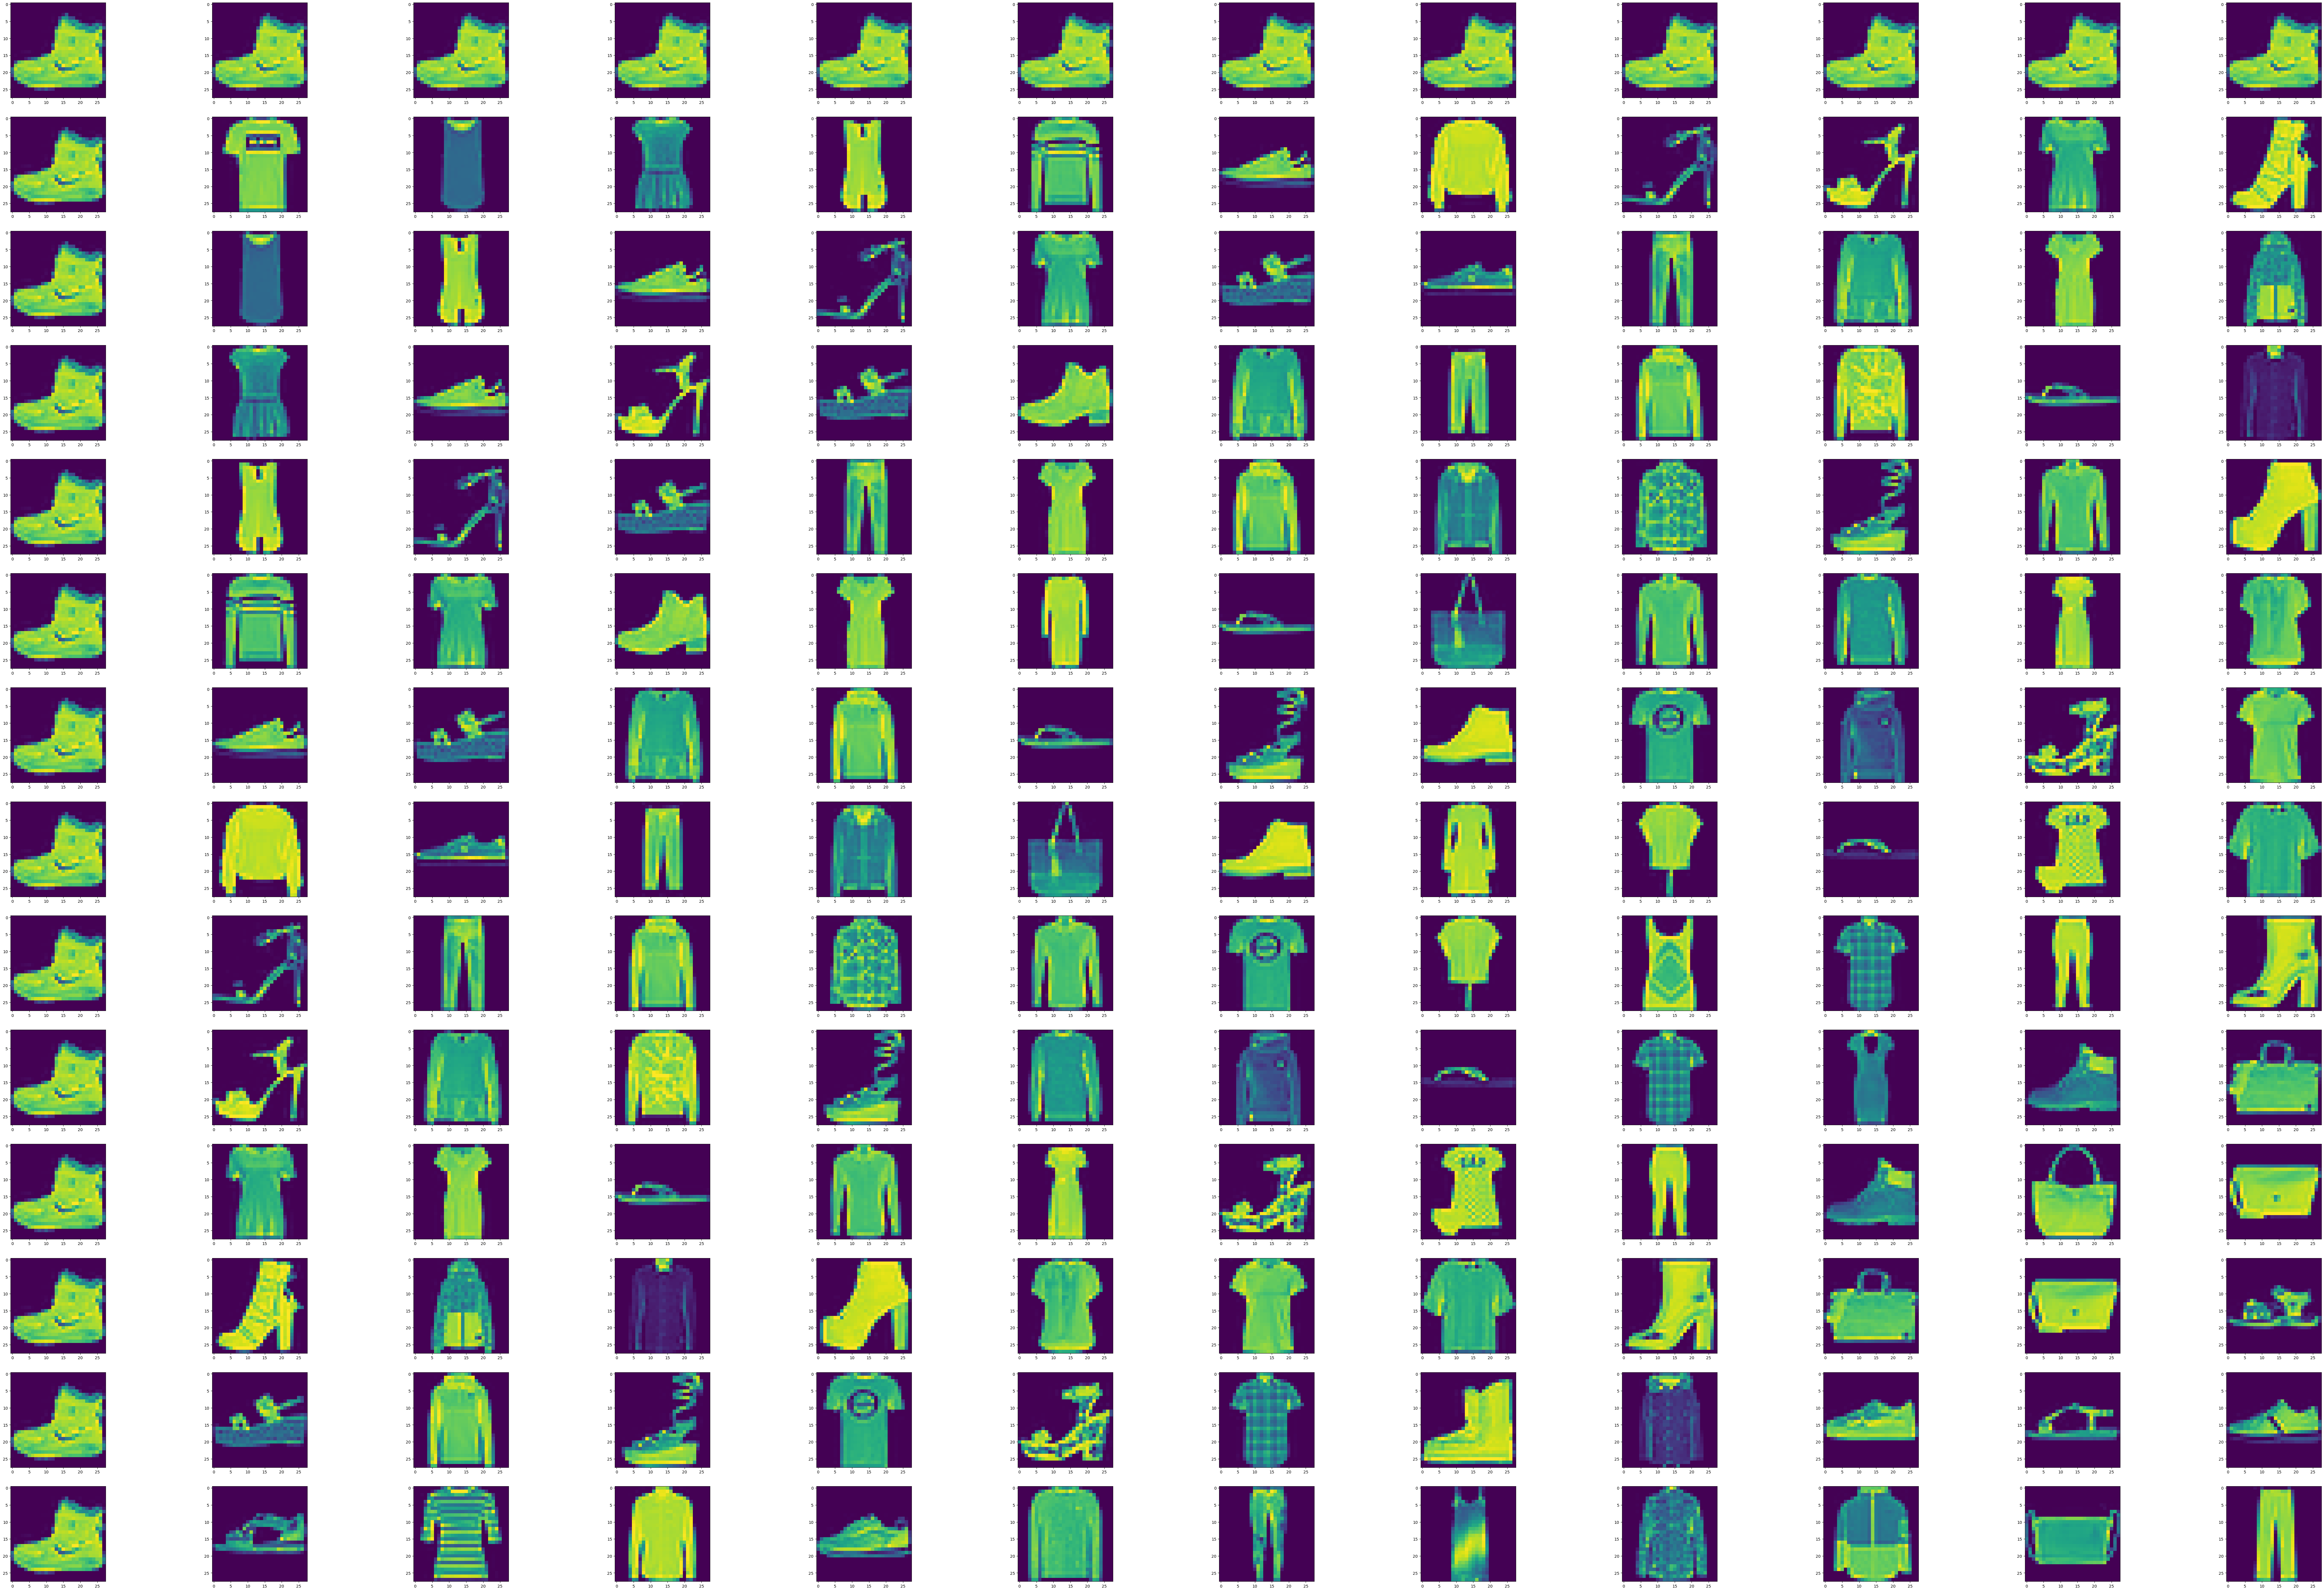

In [25]:
fig, ax = plt.subplots(nrows=14,ncols=12, figsize=(108,72))
for i in range(14):
  for j in range(12):

    ax[i, j].imshow(train_feature[i*j])
plt.savefig("Fashion MNIST training dataset")
plt.show()

In [14]:
train_feature.shape

(60000, 28, 28)

In [7]:

# preprocessing data (scaling)
train_feature = train_feature/255
test_feature = test_feature/255

In [8]:
def createModel(learning_rate):
  # create model
  model = tf.keras.Sequential()
  # add convulution layers + pooling layser
  model.add(tf.keras.layers.Conv2D(16, (3), activation="relu", input_shape=(28,28,1), padding="valid", kernel_regularizer="l2"))
  model.add(tf.keras.layers.MaxPool2D(2))
  model.add(tf.keras.layers.Conv2D(16, (3), activation="relu", input_shape=(28,28, 1),padding="valid", kernel_regularizer="l2"))
  model.add(tf.keras.layers.MaxPool2D(2))


  #  Flatting image from 2D -> 1D
  model.add(tf.keras.layers.Flatten())
  #  Add Dense Layers
  model.add(tf.keras.layers.Dense(64, "relu", activity_regularizer="l2"))
  model.add(tf.keras.layers.Dense(10, "softmax"))

  # Compiling Model
  model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

  return model

In [9]:
def trainModel(model,train_feature, train_label,batch_size, epochs):
  #  Fit data to train model
  history = model.fit(train_feature, train_label, batch_size=batch_size, epochs=epochs, validation_split=0.1)

  #  get history
  hist = pd.DataFrame(history.history)

  #  get mae history
  train_loss, train_accuracy = hist["loss"], hist["accuracy"]
  val_loss, val_accuracy = hist["val_loss"], hist["val_accuracy"]

  #  get epoch history
  epoch = history.epoch

  return train_loss,train_accuracy,val_loss,val_accuracy, epoch




In [32]:
def plot_loss_curve(train_loss, train_accuracy, val_loss, val_accuracy, epochs):
  plt.figure()
  plt.title("Loss\\Accuracy Curve")
  plt.xlabel("epochs")
  plt.ylabel("Loss\\Accuracy")

  plt.plot(epochs, train_loss, label="train_loss")
  plt.plot(epochs, train_accuracy, label="training_accuracy")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.legend()
  plt.savefig("Fashion MNIST Training Loss\\Accuracy")
  plt.show()

Epoch 1/25
3375/3375 [==============================] - 32s 9ms/step - loss: 0.7173 - accuracy: 0.8078 - val_loss: 0.5364 - val_accuracy: 0.8502
Epoch 2/25
3375/3375 [==============================] - 35s 10ms/step - loss: 0.4779 - accuracy: 0.8633 - val_loss: 0.4692 - val_accuracy: 0.8567
Epoch 3/25
3375/3375 [==============================] - 37s 11ms/step - loss: 0.4202 - accuracy: 0.8756 - val_loss: 0.4061 - val_accuracy: 0.8752
Epoch 4/25
3375/3375 [==============================] - 30s 9ms/step - loss: 0.3891 - accuracy: 0.8823 - val_loss: 0.3848 - val_accuracy: 0.8817
Epoch 5/25
3375/3375 [==============================] - 30s 9ms/step - loss: 0.3688 - accuracy: 0.8880 - val_loss: 0.3633 - val_accuracy: 0.8857
Epoch 6/25
3375/3375 [==============================] - 29s 8ms/step - loss: 0.3539 - accuracy: 0.8916 - val_loss: 0.3569 - val_accuracy: 0.8888
Epoch 7/25
3375/3375 [==============================] - 29s 9ms/step - loss: 0.3402 - accuracy: 0.8960 - val_loss: 0.3612 - val_

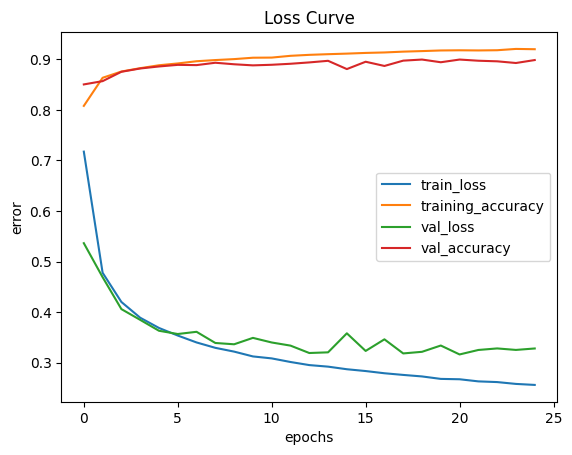

In [10]:
learning_rate=0.01
batch_size = 16
epochs = 25

model = createModel(learning_rate)
train_loss, train_acc, val_loss, val_acc, epoch = trainModel(model, train_feature, train_label, batch_size, epochs)
plot_loss_curve(train_loss=train_loss,train_accuracy=train_acc, val_loss=val_loss, val_accuracy=val_acc, epochs=epoch)

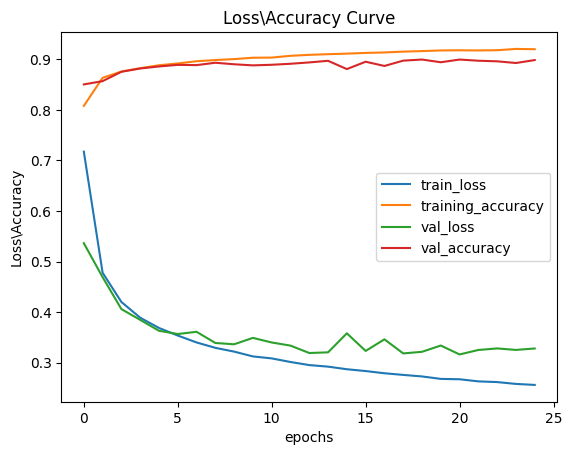

In [33]:
plot_loss_curve(train_loss=train_loss,train_accuracy=train_acc, val_loss=val_loss, val_accuracy=val_acc, epochs=epoch)


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 64)                2

In [30]:
model.evaluate(test_feature/255, test_label)

313/313 [==============================] - 2s 5ms/step - loss: 0.3348 - accuracy: 0.8954


[0.3347642719745636, 0.8953999876976013]